In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as datasets

In [15]:
# Sigmoid Function
def sigmoid(z):
    s = np.zeros_like(z)
    positive = z >= 0
    negative = ~positive
    s[positive] = 1 / (1 + np.exp(-z[positive]))
    exp_z = np.exp(z[negative])
    s[negative] = exp_z / (1 + exp_z)
    return s

# Cost Function
def cost_function(w, b, X, y, lam, eps=1e-15):
    m = len(y)
    z = b + X.dot(w)
    h = sigmoid(z)
    h = np.clip(h, eps, 1 - eps)
    J = -(1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h))) + (lam / (2 * m)) * (w.T.dot(w))
    return J

# Gradient function
def gradient(w, b, X, y, lam):
    m = len(y)
    z = b + X.dot(w)
    h = sigmoid(z)
    dw = (1 / m) * X.T.dot(h - y) + (lam / m) * w
    db = (1 / m) * np.sum(h - y)
    return dw, db

# Gradient Descent function
def gradient_descent(X, y, alpha, lam, num_iter):
    w = np.zeros(X.shape[1])
    b = 0
    
    J_history = np.zeros(num_iter)
    iter_array = np.arange(1, num_iter + 1)
    
    for i in range(num_iter):
        # Compute the cost and gradient
        J = cost_function(w, b, X, y, lam)
        dw, db = gradient(w, b, X, y, lam)
        
        w = w - alpha * dw
        b = b - alpha * db
        
        # Store the cost in the history array
        J_history[i] = J
        
        # Print the costs every 100 iterations
        if (i + 1) % 100 == 0:
            print(f"Cost at iteration {i + 1}: {J}")

    return w, b, J_history, iter_array

<h3>6b Gradient Descent</h3>

In [16]:
# Load the MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, download=True)

X_train = mnist_train.data.numpy()
y_train = mnist_train.targets.numpy()
X_test = mnist_test.data.numpy()
y_test = mnist_test.targets.numpy()

X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Convert the labels to binary values: 1 for 6 and -1 for 9
y_train = np.where(y_train == 6, 1, -1)
y_test = np.where(y_test == 6, 1, -1)

X_train = X_train[(y_train == 1) | (y_train == -1)]
y_train = y_train[(y_train == 1) | (y_train == -1)]
X_test = X_test[(y_test == 1) | (y_test == -1)]
y_test = y_test[(y_test == 1) | (y_test == -1)]

In [54]:
alpha = 0.01
lam = 0.01
num_iter = 1000

# Run gradient descent
w, b, J_history_train, iter_array_train = gradient_descent(X_train, y_train, alpha, lam, num_iter)

Cost at iteration 100: -22.3978583873724
Cost at iteration 200: -27.464438655771612
Cost at iteration 300: -27.71443549011415
Cost at iteration 400: -27.724952628343157
Cost at iteration 500: -27.725379685546848
Cost at iteration 600: -27.725358889995285
Cost at iteration 700: -27.725334323846507
Cost at iteration 800: -27.725305987102402
Cost at iteration 900: -27.725273879764856
Cost at iteration 1000: -27.72523800183575


Text(0.5, 1.0, 'Cost function for training set')

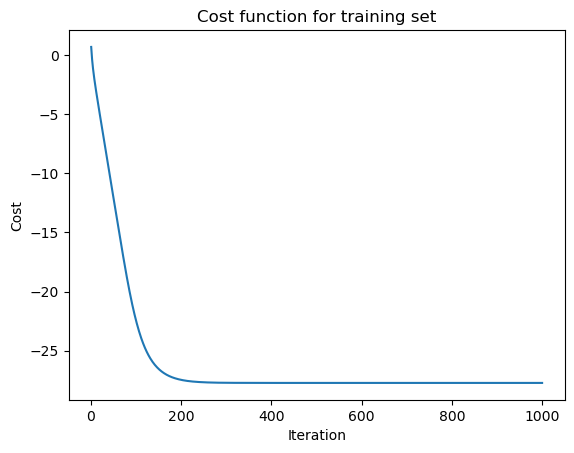

In [55]:
# Plot the cost function as a function of the iteration number for the training set
plt.plot(iter_array_train, J_history_train)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost function for training set")

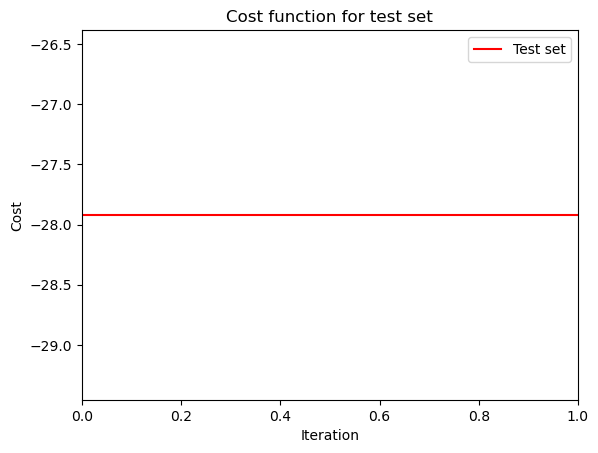

In [37]:
# Compute the cost function
J_history_test = cost_function(w, b, X_test, y_test, lam)

# Plot a horizontal line for the cost function for test
plt.axhline(y=J_history_test, color='r', label='Test set')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost function for test set")
plt.legend()

In [38]:
# Define a function to compute the misclassification error
def misclassification_error(w, b, X, y):
    # Predict the labels using the sign function
    y_pred = np.sign(b + X.dot(w))
    errors = np.sum(y_pred != y)
    return errors / len(y)

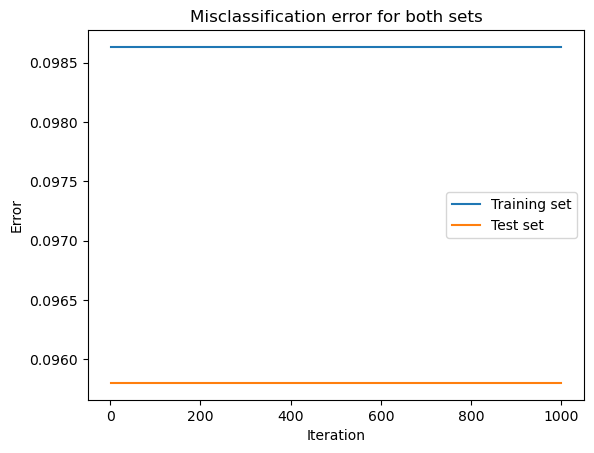

In [39]:
# Compute the misclassification error for the training set
error_train = misclassification_error(w, b, X_train, y_train)

# Compute the misclassification error for the test set
error_test = misclassification_error(w, b, X_test, y_test)

# Plot the misclassification error as a function of the iteration number for both sets
plt.plot(iter_array_train, np.repeat(error_train, num_iter), label='Training set')
plt.plot(iter_array_train, np.repeat(error_test, num_iter), label='Test set')
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Misclassification error for both sets")
plt.legend()

<h3>6c Stochastic Gradient Descent</h3>

In [24]:
# Define the stochastic gradient descent function
def stochastic_gradient_descent(X, y, alpha, lam, num_iter):
    # Initialize w and b to zeros
    w = np.zeros(X.shape[1])
    b = 0
    
    # Initialize the cost history and iteration arrays
    J_history = np.zeros(num_iter)
    iter_array = np.arange(1, num_iter + 1)
    
    for i in range(num_iter):
        j = np.random.choice(np.arange(0, len(y)))
        Xj = X[j].reshape(1, -1)
        yj = y[j]
        
        # Compute the cost and gradient using the selected data point
        J = cost_function(w, b, Xj, yj, lam)
        dw, db = gradient(w, b, Xj, yj, lam)
        
        # Update w and b
        w = w - alpha * dw
        b = b - alpha * db
        
        # Store the cost in the history array
        J_history[i] = J
        
        # Print the cost every 100 iterations
        if (i + 1) % 100 == 0:
            print(f"Cost at iteration {i + 1}: {J}")
    
    # Return the final values of w, b, and the cost history and iteration arrays
    return w, b, J_history, iter_array

In [56]:
alpha = 1
lam = 0.01
num_iter = 100
w, b, J_history_train, iter_array_train = gradient_descent(X_train, y_train, alpha, lam, num_iter)

Cost at iteration 100: -27.706718700476184


Text(0.5, 1.0, 'Cost function for training set')

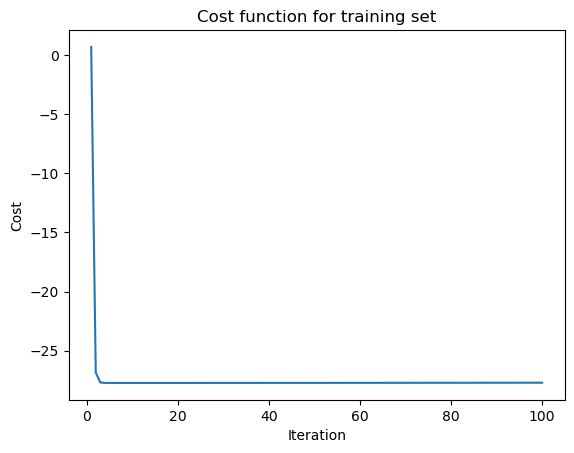

In [57]:
plt.plot(iter_array_train, J_history_train)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost function for training set")

<h3>6d Stochastic Mini-Batch Gradient Descent</h3>

In [41]:
alpha = 0.01
lam = 0.01
num_iter = 100

# Run gradient descent
w, b, J_history_train, iter_array_train = gradient_descent(X_train, y_train, alpha, lam, num_iter)

Cost at iteration 100: -22.3978583873724


Text(0.5, 1.0, 'Cost function for training set')

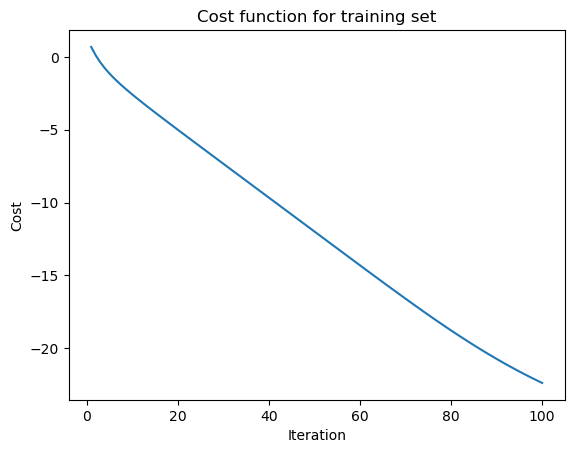

In [42]:
# Plot the cost function as a function of the iteration number for the training set
plt.plot(iter_array_train, J_history_train)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost function for training set")

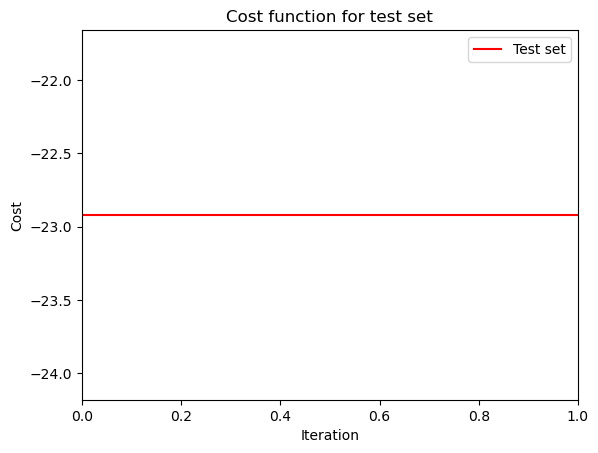

In [43]:
# Compute the cost function
J_history_test = cost_function(w, b, X_test, y_test, lam)

# Plot a horizontal line for the cost function for test
plt.axhline(y=J_history_test, color='r', label='Test set')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost function for test set")
plt.legend()

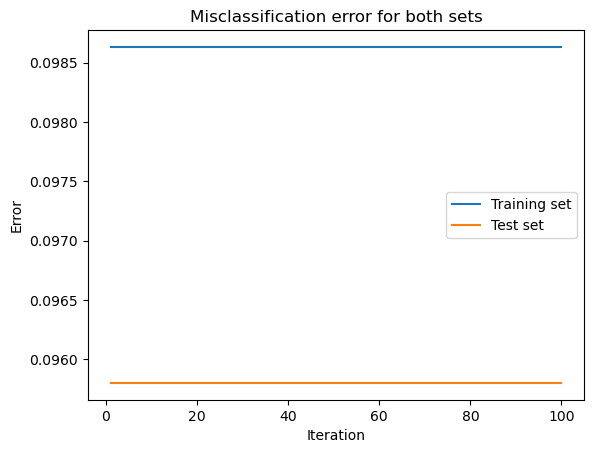

In [44]:
error_train = misclassification_error(w, b, X_train, y_train)

error_test = misclassification_error(w, b, X_test, y_test)

# Plot the misclassification error as a function of the iteration number for both sets
plt.plot(iter_array_train, np.repeat(error_train, num_iter), label='Training set')
plt.plot(iter_array_train, np.repeat(error_test, num_iter), label='Test set')
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Misclassification error for both sets")
plt.legend()